<a href="https://colab.research.google.com/github/ana-salvador-22301016/a22301016-projeto-pw/blob/main/Lab_5_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Lab: Week 5

Note: This practical session is based on the exercises in section 3.7.10 and 3.7.11

First, let's install the packages that we will use in this lab

For these exercises we use the numpy library in version 1.22, which is compatible with the ISLP library.

In [ ]:
# !pip install --force-reinstall -v "numpy==1.22"
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=97310013f649ca82a41809ac028c4498fcccfa679a9b8d4c25e9c8d502e1ae19
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [ ]:
#import das bibliotecas
import numpy as np
import pandas as pd
#statsmodel api simples
import statsmodels.api as sm
#statsmodel api via formula
import statsmodels.formula.api as smf
#load dos dataset
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)
import math

If you are using Google Colab, after installing the above packages, restart the terminal.

# 3.7.10 - Carseats Dataset

source: https://rdrr.io/cran/ISLR/man/Carseats.html

1 - Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [ ]:
#load do dataset Carseats
car = load_data("Carseats")
#print das colunas
car.columns
#print da infor das colunas
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [ ]:
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
car.corr()

ValueError: could not convert string to float: 'Yes'

In [ ]:
#print da tabela de correlação
car[['Sales','Price']].corr()

,Sales,Price
Sales,1.000000,-0.444951
Price,-0.444951,1.000000


In [ ]:
#agora podemos criar regressoes através da api.formula
#o formado utilizado é o mesmo de uma equação sendo o '=' substituido por '~'
#portanto para a equeação abaixo temos Sales = Price + Urban + US
#Sales é a variavel dependente
#Price, Urban e US as variaveis independentes

#cria-se o modelo com a formula
mod = smf.ols(formula='Sales ~ Price + ShelveLoc + Advertising', data=car)
#faze-se o fit de x em Y
res = mod.fit()
#print da tabela
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           4.48e-79
Time:                        20:47:25   Log-Likelihood:                -794.81
No. Observations:                 400   AIC:                             1600.
Df Residuals:                     395   BIC:                             1620.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.4680    

In [ ]:
#agora podemos criar regressoes através da api.formula
#o formado utilizado é o mesmo de uma equação sendo o '=' substituido por '~'
#portanto para a equeação abaixo temos Sales = Price + Urban + US
#Sales é a variavel dependente
#Price, Urban e US as variaveis independentes

#cria-se o modelo com a formula
mod = smf.ols(formula='Sales ~ Price + US', data=car)
#faze-se o fit de x em Y
res = mod.fit()
#print da tabela
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.66e-24
Time:                        21:29:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [ ]:
#caso esteja trabalhando com a api normal se faz necessário converter os dados qualitativos em numéricos
#usa-se a funçao get_dumies e atribui-se um prefixo a cada variavel
dummy_US = pd.get_dummies(car['US'], prefix="US",dtype='int')
dummy_US

,US_No,US_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
395,0,1
396,0,1
397,0,1
398,0,1


In [ ]:
dummy_Urban = pd.get_dummies(car['Urban'], prefix="Urban", dtype='int')
dummy_Urban

,Urban_No,Urban_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
395,0,1
396,1,0
397,0,1
398,0,1


In [ ]:
#faze-se o join dessas novas colunas criadas ao dataset original
car = car.join(dummy_US)
car = car.join(dummy_Urban)
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,US_No,US_Yes,Urban_No,Urban_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,0,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0,1,0,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1,0,0,1


In [ ]:
#agora
X = pd.DataFrame({'intercept': np.ones(len(car)),
                  'Price': car['Price'],
                  'US_Yes': car['US_Yes'],
                  # 'Urban_Yes': car['Urban_Yes']
                  })

X

,intercept,Price,US_Yes
0,1.0,120,1
1,1.0,83,1
2,1.0,80,1
3,1.0,97,1
4,1.0,128,0
...,...,...,...
395,1.0,128,1
396,1.0,120,1
397,1.0,159,1
398,1.0,95,1


In [ ]:
#criando o vetor da variavel dependente
y = car['Sales']

#feito o dataset X e o vetor y vamos criar o modelo
model = sm.OLS(y, X)

#agora vamos fazer o fit dos valores de X para os valores de y
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.66e-24
Time:                        21:29:47   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.0

2 - Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

In [ ]:
#b0 é o intercept
#Urban possui um alto p-value portanto aceita-se a hipotese do coeficiente ser nulo(considerando um alfa de 5)
#US é um coeficiente positivo para um US = Yes portanto lojas dentro dos estados unidos afetam positivamente nas vendas.
#quanto menor o preço maior as vendas.

3 - Write out the model in equation form, being careful to handle the qualitative variables properly.

In [ ]:
#Sales = 13.04 + 1.20*US(Yes) - 0.054*Price
#ja removendo Urban


4 - For which of the predictors can you reject the null hypothesis H0 :βj =0?

In [ ]:
#Todos exceto urban.

5 - On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [ ]:
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,US_No,US_Yes,Urban_No,Urban_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,0,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0,1,0,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1,0,0,1


6 - How well do the models in (a) and (e) fit the data?

In [ ]:

#Para definir se um modelo se ajusta bem aos dados ou não usamos como métrica o RSE e o Rquadrado
#considere as formulas que temos das aulas teóricas


#para RSE
#cria o dataframe para fazer o predict
X = pd.DataFrame({'Intercept':[13.0308 for _ in range(0,len(car))],
                              'US':car['US'],
                              'Price':car['Price']})

#true y
y_true = np.array(car['Sales'])
#predict y
y_predicted = np.array(res.predict(X))
#calculo do RSS
RSS = np.sum(np.square(y_true - y_predicted))
#calculo do RSE
rse = math.sqrt(RSS / (len(y_true) - 2))
print(rse)

#ou
print(np.sqrt(res.scale))


# #para R-square
y_mean = np.mean(y_true)
TSS = np.sum(np.square(y_true - y_mean))
# print(TSS)
R_square = 1 - (RSS/TSS)
print(R_square)

#or
#olhar na tabela de summary



2.466292592181307
2.469396800574444
0.23926288842678567


7 - Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [ ]:
#para imprimir o intervalor de confirança a 95%
res.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


8 - Is there evidence of outliers or high leverage observations in the model from (e)?

In [ ]:
#vamos usar como teste de outlier o bonf(p)
#para acessa-lo basta usar o outlier_test()
test = res.outlier_test(alpha=0.05)
test

,student_resid,unadj_p,bonf(p)
0,0.732720,0.464162,1.0
1,0.614266,0.539392,1.0
2,0.076326,0.939198,1.0
3,-0.627399,0.530759,1.0
4,-0.775210,0.438679,1.0
...,...,...,...
395,2.166210,0.030891,1.0
396,-0.629705,0.529251,1.0
397,0.749780,0.453832,1.0
398,-1.266235,0.206173,1.0


In [ ]:
#como critério baseado no alfa
#imprimir todos os valores onde bonf(p) é menor que 0.05
test[test['bonf(p)']<0.05]

,student_resid,unadj_p,bonf(p)


# 3.7.11 - Random Dataset

In [ ]:
#criar um gerador de numeros randomicos através do seed de numero 1
rng = np.random.default_rng(1)
#gerar 100 valores de x randomicos
x = rng.normal(size=100)
#gerar 100 valores de y usando uma componente randomica e outra componente dependente de x
y = 2 * x + rng.normal(size=100)

1 - Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the keywords argument intercept=False to ModelSpec().)

In [ ]:
#criar um dataframe com os dados aleatórios gerados acima
df = pd.DataFrame({'x':x,
                   'y':y})

df

,x,y
0,0.345584,0.039887
1,0.821618,2.505681
2,0.330437,0.535282
3,-1.303157,-1.937161
4,0.905356,3.029555
...,...,...
95,-2.250854,-6.119176
96,-0.138655,0.832327
97,0.033000,0.234106
98,-1.425349,-2.302292


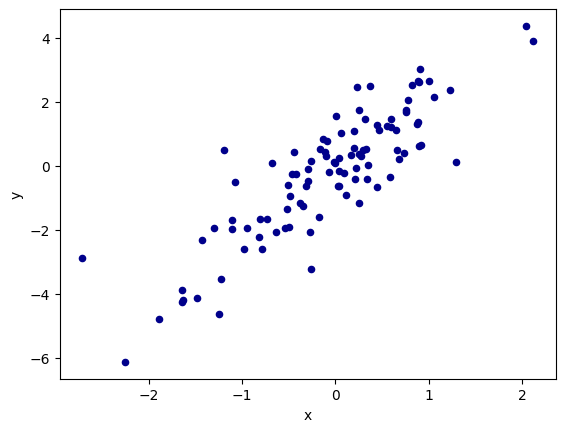

In [ ]:
#vamos plotar os dados para verificar a relação linear
ax1 = df.plot.scatter(x='x',
                      y='y',
                      c='DarkBlue')

In [ ]:
#criar o dataset a partir do dataframe sem o intercept
design = MS(['x'], intercept=False)
design = design.fit(df)
X = design.transform(df)
# X
#criar o vetor y
y = df['y']
# y

In [ ]:
#cria-se o modelo e faz-se a regressao
model = sm.OLS(y, X)
results = model.fit()
#print da tabela
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                    6.23e-31
Time:                        21:35:07   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

2 - Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

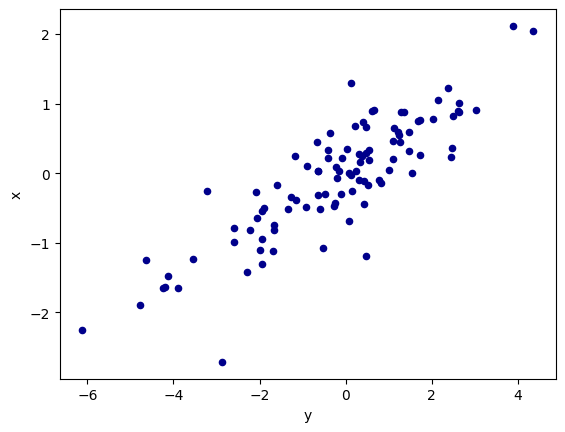

In [ ]:
#vamos repetir o exercicio agora invertendo os valors de x e y
ax1 = df.plot.scatter(x='y',
                      y='x',
                      c='DarkBlue')

In [ ]:
#repetimos o modelo invertendo X por y
model = sm.OLS(X, y)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                    6.23e-31
Time:                        21:38:12   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

3 - What is the relationship between the results obtained in (1) and (2)?

In [ ]:
#observar o coeficiente (slope) quando se muda x e y.
#apesar de modelos diferentes a curva é a mesma ou espelhada